### DIEGO OBANDO FONSECA 2019064598

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Trapezoide(y0,yi,i,t):
    Wi = y0 + (h) * (1/2) * (F(y0,t[i]) + F(yi, t[i+1]))
    return(Wi)

In [5]:
def EDOEuler_m(y0, t):
    '''Esta función aproxima la solución de la EDO de primer orden
    y'=f(y,t) por medio del método de Euler.

    Parámetros de la función
    ------------------------
    f : función de las variables y, t de la EDO

    y0 : valor inicial de y en t = t0, es decir, y(t0) = y0

    t : conjunto de los valores de t en que se aproximarán los valores de y,
        en forma de una arreglo en una dimensión (1D)

    Salida de la función
    --------------------
    y : arreglo 1D con los valores aproximados de y(t) por medio del método de
        Euler
    '''
    # Se inicializa el arreglo con los valores aproximados utilizando la
    # cantidad de valores de t de interés
    y = np.zeros(len(t))
    
    # Se establece la condición inicial
    y[0] = y0
    # Se realiza el cálculo de los valores aproximados de y para cada t
    # El ciclo for inicia en 0 y termina en lent(t)-1 pues el primer 
    # elemento de los arrays de numpy tiene el índice 0 y a partir
    # de este elemento se tienen que contar los lent(t) demás
    for i in range(0, len(t)-1):
        y[i+1] = y[i]+h*F(y[i], t[i])
        y[i+1] = Trapezoide(y[i],y[i+1],i,t)
    return y        

In [10]:
def EDOEuler(f, y0, t):
    '''Esta función aproxima la solución de la EDO de primer orden
    y'=f(y,t) por medio del método de Euler.

    Parámetros de la función
    ------------------------
    f : función de las variables y, t de la EDO

    y0 : valor inicial de y en t = t0, es decir, y(t0) = y0

    t : conjunto de los valores de t en que se aproximarán los valores de y,
        en forma de una arreglo en una dimensión (1D)

    Salida de la función
    --------------------
    y : arreglo 1D con los valores aproximados de y(t) por medio del método de
        Euler
    '''
    # Se inicializa el arreglo con los valores aproximados utilizando la
    # cantidad de valores de t de interés
    y = np.zeros(len(t))

    # Se establece la condición inicial
    y[0] = y0
    
    # Se realiza el cálculo de los valores aproximados de y para cada t
    # El ciclo for inicia en 0 y termina en lent(t)-1 pues el primer 
    # elemento de los arrays de numpy tiene el índice 0 y a partir
    # de este elemento se tienen que contar los lent(t) demás
    for i in range(0, len(t)-1):
        y[i+1] = y[i]+h*F(y[i], t[i])
    return y

In [6]:
def F(y, t):
    '''Esta función calcula el valor de la función F que corresponde
    a la EDO de primer orden y'=F(y, t)

    Parámetros de la función
    ------------------------
    y : valor y para un punto t particular

    t : valor particular de t

    Salida de la función
    --------------------
    valorF : valor de la función evaludada
    '''
    # Para el caso del decaimiento de partículas inestables
    valorF = -y
    return valorF

In [7]:
# Se define el paso de interés para la aplicación de método de Euler
h = 0.25

In [8]:
# Se define el universo de valores de t de interés y el valor inicial de y
ti = 0.0
tf = 5.0
t = np.arange(ti, tf, h)
y0 = 100.0
dx= (tf-ti)/h

In [11]:
# Luego se calculan los valores aproximados de y(t) por Euler
y_aprox_Euler = EDOEuler(F, y0, t)

In [17]:
# Se calculan los valores verdaderos de y(t)
y_verdadero = y0*np.exp(-t)
print(y_verdadero)

[100.          77.88007831  60.65306597  47.23665527  36.78794412
  28.65047969  22.31301601  17.37739435  13.53352832  10.53992246
   8.20849986   6.39278612   4.97870684   3.87742078   3.01973834
   2.35177459   1.83156389   1.42642339   1.11089965   0.86516952]


In [18]:
y_mejorado = EDOEuler_m(y0, t)
print(y_mejorado)

[100.          78.125       61.03515625  47.68371582  37.25290298
  29.10383046  22.73736754  17.76356839  13.87778781  10.84202172
   8.47032947   6.6174449    5.16987883   4.03896783   3.15544362
   2.46519033   1.92592994   1.50463277   1.17549435   0.91835496]


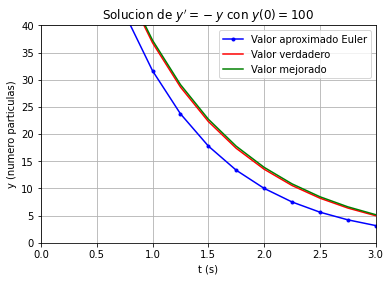

In [16]:
# Se prepara un gráfico para comparar los resultados
fig = plt.figure()
plt.plot(t, y_aprox_Euler, 'b.-', label='Valor aproximado Euler')
plt.plot(t, y_verdadero, 'r-', label='Valor verdadero')
plt.plot(t, y_mejorado, 'g-', label = 'Valor mejorado')
plt.axis([ti, tf, 0.0, y0+20.0])
plt.xlabel("t (s)")
plt.ylabel("y (numero particulas)")
plt.xlim(0,3)
plt.ylim(0,40)
plt.grid(True)
plt.title("Solucion de $y'=-y$ con $ y(0)=100$")
plt.legend(loc='upper right')
fig.savefig("04 EDO - EJEM01 Euler.png")
